1. Low Training score and cross validation score : indicates Underfitting
2. High training score and low cross validation score : indicates Overfitting
3. Both score high and converging : suggest a well-fitted Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

In [3]:
digits = load_digits()
x, y = digits.data, digits.target

In [4]:
x = pd.DataFrame(x)

In [5]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
y = pd.DataFrame(y)

In [9]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [12]:
y.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

# Model creating

In [13]:
# create a decission tree classifier
model = DecisionTreeClassifier()

In [14]:
# set up the learning curve parameters
cv = ShuffleSplit(n_splits=100, random_state=42)

In [17]:
# Generate learning curve 
train_sizes, train_score, test_score = learning_curve(model, x, y, cv=cv, 
                                                      scoring = 'accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

In [19]:
#train_sizes = np.linspace(0.1, 1.0, 10)

In [20]:
#train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [23]:
train_score

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.

In [21]:
# Calculate the mean and standard deviation across folds
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_mean = np.mean(test_score, axis=1)
test_score_std = np.std(test_score, axis=1)

In [22]:
train_score_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
test_score_mean

array([0.67238889, 0.7485    , 0.78522222, 0.81038889, 0.82722222,
       0.83938889, 0.8445    , 0.84872222, 0.85172222, 0.85683333])

# Plot the learning curve

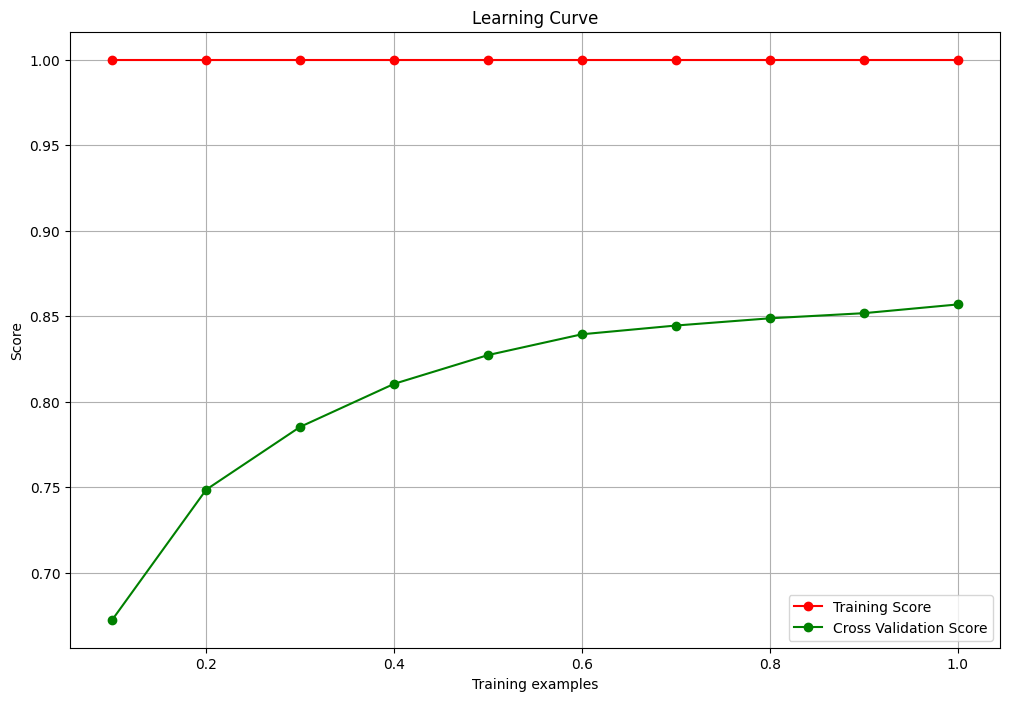

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(train_size, train_score_mean, 'o-', color = 'r', label = "Training Score")
plt.plot(train_size, test_score_mean, 'o-', color = 'g', label = "Cross Validation Score")

# customize the plot

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()